# Notebook to generate all figures in the paper

In [1]:
import numpy as np
from dataLoad import dataset_from_name
from optimizer.linear import Optimal
import itertools
from matplotlib import pyplot as plt
from tqdm import tqdm_notebook
import pickle

## Figure 2(a). Utility $U^*$ for Adult dataset

In [2]:
opt = Optimal()
data = dataset_from_name("adult").astype(int)
opt.learn(data[["sex", "sex", "age", "education", "relationship", "native_country", "native_country"]].values, data[["income"]].values)
alpha2 = 0.3
alpha1s = np.linspace(alpha2, 1, 20)
u = {"uf": [], "gf": [], "lf": []}
for alpha1 in alpha1s:
    u["uf"].append(opt.fit([alpha1, alpha2]))
    u["gf"].append(opt.fit([alpha1, alpha2], fairness_type="gf", fairness_def="dp"))
    u["lf"].append(opt.fit([alpha1, alpha2], fairness_type="lf", fairness_def="dp"))

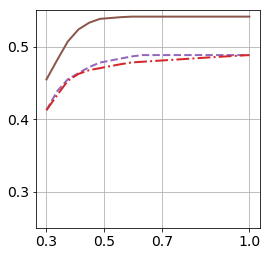

In [3]:
fig = plt.figure(figsize=(4,4))
names = ["UF", "GF", "LF"]
colors=["#8c564b", "#9467bd", "#d62728"]
linestyles=["-", "--", "-."]
# plt.subplot(121)
plt.ylim(0.25, 0.55)
for i, v in enumerate(u):
    plt.plot(alpha1s, u[v], linestyles[i], color=colors[i], linewidth=2,)
plt.xticks([0.3, 0.5, 0.7, 1], fontsize=14)
plt.yticks([0.3, 0.4, 0.5], fontsize=14)
plt.grid()
plt.savefig("../fig/u_gap-1.pdf", bbox_inches='tight')

## Figure 2(b). Utility $U^*$ for Adult dataset

In [4]:
opt = Optimal()
data = dataset_from_name("adult").astype(int)
opt.learn(data[["sex", "age", "age", "education", "sex","relationship", "native_country"]].values, data[["income"]].values)
alpha2 = 0.3
alpha1s = np.linspace(alpha2, 1, 20)
u = {"uf": [], "gf": [], "lf": []}
for alpha1 in alpha1s:
    u["uf"].append(opt.fit([alpha1, alpha2]))
    u["gf"].append(opt.fit([alpha1, alpha2], fairness_type="gf", fairness_def="dp"))
    u["lf"].append(opt.fit([alpha1, alpha2], fairness_type="lf", fairness_def="dp"))

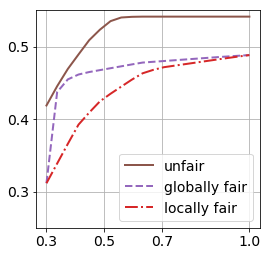

In [5]:
fig = plt.figure(figsize=(4,4))
names = ["UF", "GF", "LF"]
colors=["#8c564b", "#9467bd", "#d62728"]
linestyles=["-", "--", "-."]
# plt.subplot(121)
plt.ylim(0.25, 0.55)
for i, v in enumerate(u):
    plt.plot(alpha1s, u[v], linestyles[i], color=colors[i], linewidth=2,)
plt.xticks([0.3, 0.5, 0.7, 1], fontsize=14)
plt.yticks([0.3, 0.4, 0.5], fontsize=14)
plt.grid()
names = ["unfair", "globally fair", "locally fair"]
plt.legend(names, fontsize=14)
plt.savefig("../fig/u_gap-2.pdf", bbox_inches='tight')

## Figure 3. Empirical CDF of $PoLF$ for all data


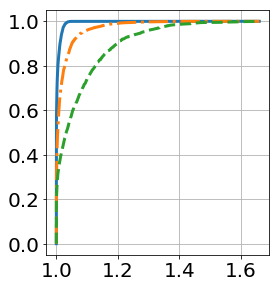

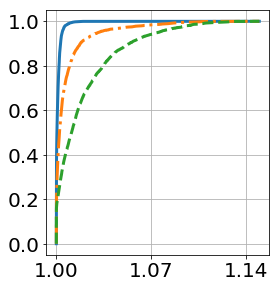

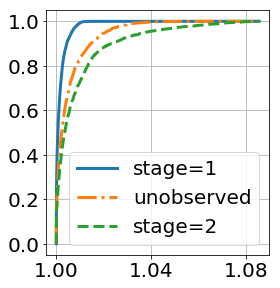

In [6]:
for dataset_name in ["adult", "compas", "german"]:
    data = pickle.load(open("./data/polf-fair-{}-dp.pickle".format(dataset_name), "rb"))
    polf = [[], [], []]
    for Xs in list(data)[:-1]:
        for i in range(len(data[Xs])):
            for j in range(3):
                polf[j] += list(data[Xs][i][j])
    n = len(polf[0])
    y = np.linspace(0, 1, n+1)
    plt.figure(figsize=(4, 4.5))
    max_polf = np.max(polf[1])
    plt.plot(list(np.sort(polf[0])) + [max_polf], y, "-", color="#1f77b4", linewidth=3, label="stage=1")
    plt.plot(list(np.sort(polf[2])) + [max_polf], y,  "-.", color="#ff7f0e",linewidth=3,label="unobserved")
    plt.plot(list(np.sort(polf[1])) + [max_polf], y, "--", color="#2ca02c", linewidth=3,label="stage=2")
    if dataset_name == "adult": 
        plt.xticks([1, 1.2, 1.4, 1.6], fontsize=20)
    elif dataset_name == "compas":
        plt.xticks([1, 1.07, 1.14], fontsize=20)
    elif dataset_name == "german":
        plt.xticks([1, 1.04, 1.08], fontsize=20)


    plt.yticks(fontsize=20)
    plt.grid()
    if dataset_name=="german":
        plt.legend(fontsize=20)
    plt.savefig("../fig/polf-{}.pdf".format(dataset_name), bbox_inches="tight")

## Figure 4. Empirical CDF of $VoLF$ for all data

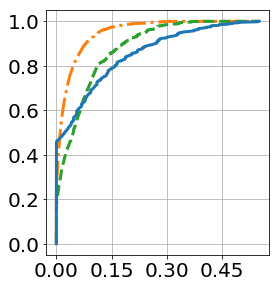

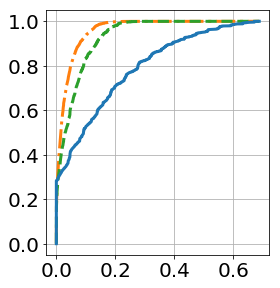

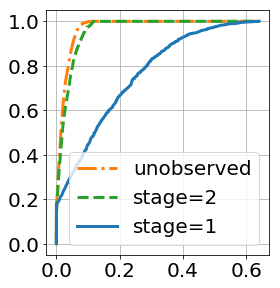

In [7]:
for dataset_name in ["adult", "compas", "german"]:
    data = pickle.load(open("./data/volf-fair-{}-dp.pickle".format(dataset_name), "rb"))
    volf = [[], [], []]
    for Xs in list(data)[:-1]:
        for i in range(len(data[Xs])):
            for j in range(3):
                volf[j] += list(data[Xs][i][j])
    n = len(volf[0])
    y = np.linspace(0, 1, n+1)
    plt.figure(figsize=(4, 4.5))
    max_volf = np.max(volf[0])
    plt.plot(list(np.sort(volf[2])) + [max_volf], y,  "-.", color="#ff7f0e",linewidth=3,label="unobserved")
    plt.plot(list(np.sort(volf[1])) + [max_volf], y, "--", color="#2ca02c", linewidth=3,label="stage=2")
    plt.plot(list(np.sort(volf[0])) + [max_volf], y, "-", color="#1f77b4", linewidth=3, label="stage=1")

    if dataset_name == "adult": 
        plt.xticks([0.0, 0.15, 0.3, 0.45], fontsize=20)
    elif dataset_name == "compas":
        plt.xticks([0.0, 0.2, 0.4, 0.6], fontsize=20)
    elif dataset_name == "german":
        plt.xticks([0.0, 0.2, 0.4, 0.6], fontsize=20)
    plt.yticks(fontsize=20)
    plt.grid()
    if dataset_name=="german":
        plt.legend(fontsize=20)
    plt.savefig("../fig/volf-{}.pdf".format(dataset_name), bbox_inches="tight")

## Figure 5. Joint distribution of $VoLF$ and $PoLF$ for Adult dataset

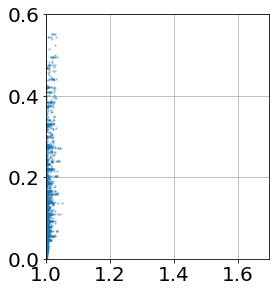

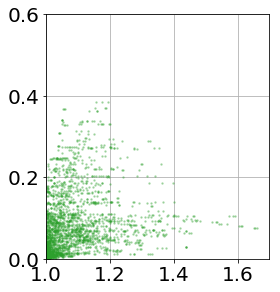

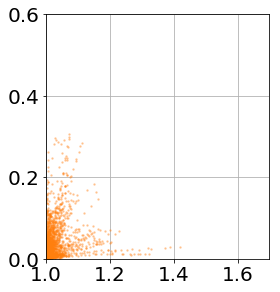

In [8]:
dataset_name = "adult"
volf_data = pickle.load(open("./data/volf-fair-{}-dp.pickle".format(dataset_name), "rb"))
polf_data = pickle.load(open("./data/polf-fair-{}-dp.pickle".format(dataset_name), "rb"))

volf = [[], [], []]
polf = [[], [], []]

for Xs in list(volf_data)[:-1]:
    for i in range(len(volf_data[Xs])):
        for j in range(3):
            volf[j] += list(volf_data[Xs][i][j])
            polf[j] += list(polf_data[Xs][i][j])

colors = ["#1f77b4", "#2ca02c","#ff7f0e", ]
for stage in range(3):
    plt.figure(figsize=(4, 4.5))
    plt.ylim(0, 0.6)
    plt.xlim(1, 1.7)
    plt.xticks([1.0, 1.2, 1.4, 1.6], fontsize=20)
    plt.yticks([0.0, 0.2, 0.4, 0.6], fontsize=20)
    plt.plot(polf[stage], volf[stage],  ".", color=colors[stage], alpha=0.3, markersize=3)
    plt.grid()
    plt.savefig("../fig/polf-volf-{}.pdf".format(stage+1), bbox_inches='tight')

# Appendix

## Figure 6. The cumulative distribution function of $PoLF$

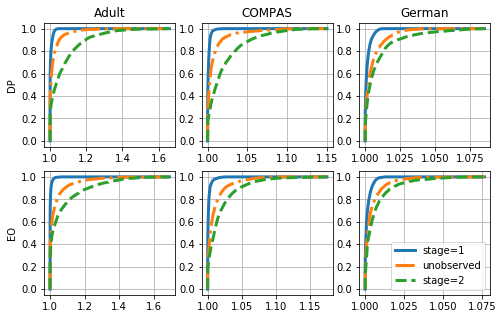

In [9]:
s = 1
plt.figure(figsize=(8, 5))
for fairness_def in ["dp", "eo"]:
    for dataset_name in ["adult", "compas", "german"]:
        data = pickle.load(open("./data/polf-fair-{}-{}.pickle".format(dataset_name, fairness_def), "rb"))
        polf = [[], [], []]
        for Xs in list(data)[:-1]:
            for i in range(len(data[Xs])):
                for j in range(3):
                    polf[j] += list(data[Xs][i][j])
        n = len(polf[0])
        y = np.linspace(0, 1, n+1)
        plt.subplot(2,3,s)
        if s == 1:
            plt.title("Adult")
            plt.ylabel("DP")
        elif s == 2:
            plt.title("COMPAS")
        elif s == 3:
            plt.title("German")
        elif s == 4:
            plt.ylabel("EO")
        s+=1
        max_polf = np.max(polf[1])
        plt.plot(list(np.sort(polf[0])) + [max_polf], y, "-", color="#1f77b4", linewidth=3, label="stage=1")
        plt.plot(list(np.sort(polf[2])) + [max_polf], y,  "-.", color="#ff7f0e",linewidth=3,label="unobserved")
        plt.plot(list(np.sort(polf[1])) + [max_polf], y, "--", color="#2ca02c", linewidth=3,label="stage=2")
        plt.grid()
plt.legend()
plt.savefig("../fig/polf-all-def.pdf", bbox_inches="tight")

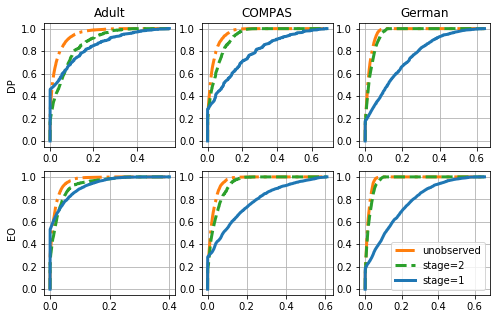

In [10]:
s = 1
plt.figure(figsize=(8, 5))
for fairness_def in ["dp", "eo"]:
    for dataset_name in ["adult", "compas", "german"]:
        data = pickle.load(open("./data/volf-fair-{}-{}.pickle".format(dataset_name, fairness_def), "rb"))
        volf = [[], [], []]
        for Xs in list(data)[:-1]:
            for i in range(len(data[Xs])):
                for j in range(3):
                    volf[j] += list(data[Xs][i][j])
        n = len(volf[0])
        y = np.linspace(0, 1, n+1)
        plt.subplot(2,3,s)
        if s == 1:
            plt.title("Adult")
            plt.ylabel("DP")
        elif s == 2:
            plt.title("COMPAS")
        elif s == 3:
            plt.title("German")
        elif s == 4:
            plt.ylabel("EO")
        s+=1
        max_volf = np.max(volf[0])
        plt.plot(list(np.sort(volf[2])) + [max_volf], y,  "-.", color="#ff7f0e",linewidth=3,label="unobserved")
        plt.plot(list(np.sort(volf[1])) + [max_volf], y, "--", color="#2ca02c", linewidth=3,label="stage=2")
        plt.plot(list(np.sort(volf[0])) + [max_volf], y, "-", color="#1f77b4", linewidth=3, label="stage=1")

        plt.grid()
plt.legend()
plt.savefig("../fig/volf-all-def.pdf", bbox_inches="tight")

## Figure. Joint distribution of $PoLF_1$ and $PoLF_2$ for Adult dataset

Choose dataset_name $\in$ {adult, compas, german} and specify the sensitive attributes

600 0.84
600 0.935
600 0.945
600 0.8533333333333334
600 0.89
600 0.9516666666666667


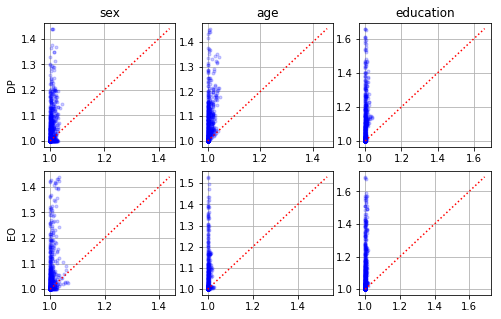

In [11]:
plt.figure(figsize=(8, 5))
s=1
dataset_name = "adult"
for fairness_def in ["dp", "eo"]:
    data = pickle.load(open("./data/polf-fair-{}-{}.pickle".format(dataset_name, fairness_def), "rb"))
    for Xs in ["sex", "age", "education"]:
        plt.subplot(2,3,s)
        if s < 4:
            plt.title(Xs)
        if s == 1:
            plt.ylabel("DP")
        elif s == 4:
            plt.ylabel("EO")
        polf = [[], [], []]
        for i in range(len(data[Xs])):
            for j in range(3):
                polf[j] += list(data[Xs][i][j])
        print (len(polf[0]), np.mean(np.array(polf[0]) < np.array(polf[1])))
        plt.plot(polf[0], polf[1], ".", color="blue", alpha=0.2)
        plt.plot([1, np.max(polf[1])], [1, np.max(polf[1])], color="red", linestyle=":")
        plt.grid()
        s += 1
# plt.savefig("../fig/2-polf1-polf2-adult.pdf", bbox_inches="tight")

## Figure. Joint distribution of $VoLF_1$ and $VoLF_2$
Choose dataset_name $\in$ {adult, compas, german} and specify the sensitive attributes

600 0.43666666666666665
600 0.355
600 0.2
600 0.32166666666666666
600 0.315
600 0.23166666666666666


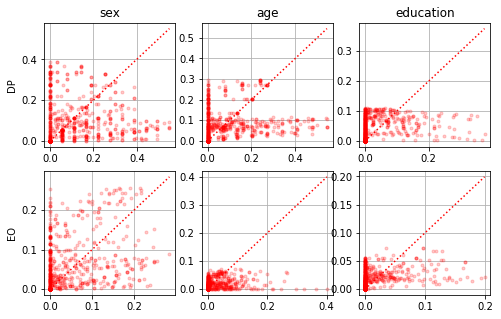

In [12]:
plt.figure(figsize=(8, 5))
s=1
dataset_name = "adult"
for fairness_def in ["dp", "eo"]:
    data = pickle.load(open("./data/volf-fair-{}-{}.pickle".format(dataset_name, fairness_def), "rb"))
    for Xs in ["sex", "age", "education"]:
        plt.subplot(2,3,s)
        if s < 4:
            plt.title(Xs)
        if s == 1:
            plt.ylabel("DP")
        elif s == 4:
            plt.ylabel("EO")
        volf = [[], [], []]
        for i in range(len(data[Xs])):
            for j in range(3):
                volf[j] += list(data[Xs][i][j])
        print (len(volf[0]), np.mean(np.array(volf[0]) > np.array(volf[1])))
        plt.plot(volf[0], volf[1], ".", color="red", alpha=0.2)
        plt.plot([0, np.max(volf[0])], [0, np.max(volf[0])], color="red", linestyle=":")
        plt.grid()
        s += 1
# plt.savefig("../fig/2-polf1-polf2-adult.pdf", bbox_inches="tight")

## Figures 8-9. Joint distribution of $VoLF$ and $PoLF$ for various datasets

Choose dataset_name $\in$ {adult, compas, german}

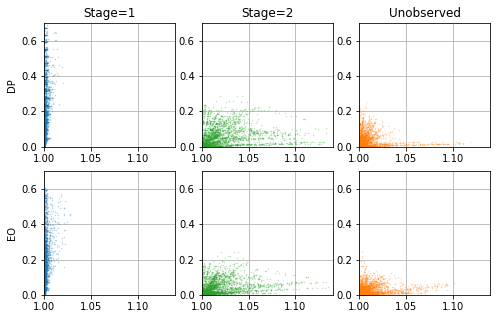

In [13]:
dataset_name = "compas"
plt.figure(figsize=(8, 5))
s = 1
for fairness_def in ["dp", "eo"]:
    volf_data = pickle.load(open("./data/volf-fair-{}-{}.pickle".format(dataset_name, fairness_def), "rb"))
    polf_data = pickle.load(open("./data/polf-fair-{}-{}.pickle".format(dataset_name, fairness_def), "rb"))

    volf = [[], [], []]
    polf = [[], [], []]

    for Xs in list(volf_data)[:-1]:
        for i in range(len(volf_data[Xs])):
            for j in range(3):
                volf[j] += list(volf_data[Xs][i][j])
                polf[j] += list(polf_data[Xs][i][j])

    colors = ["#1f77b4", "#2ca02c","#ff7f0e", ]
    for stage in range(3):
        plt.subplot(2,3,s)
        plt.ylim(0, 0.7)
        plt.xlim(1, 1.14)
        plt.plot(polf[stage], volf[stage],  ".", color=colors[stage], alpha=0.3, markersize=1)
        plt.grid()
        if s == 1:
            plt.title("Stage=1")
            plt.ylabel("DP")
        elif s == 2:
            plt.title("Stage=2")
        elif s == 3:
            plt.title("Unobserved")
        elif s == 4:
            plt.ylabel("EO")
        s += 1
plt.savefig("../fig/polf-volf-{}.pdf".format(dataset_name), bbox_inches='tight')

## Figure 10. The cumulative distribution function of $PoLF$ for 3-stage algorithm

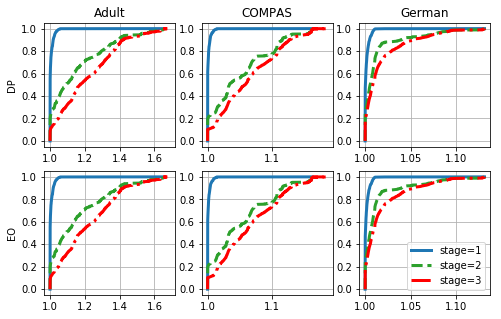

In [14]:
s = 1
plt.figure(figsize=(8, 5))
for fairness_def in ["dp", "dp"]:
    for dataset_name in ["adult", "compas", "german"]:
        data = pickle.load(open("./data/polf-3-fair-{}-{}.pickle".format(dataset_name, fairness_def), "rb"))
        polf = [[], [], [], []]
        for Xs in list(data)[:-1]:
            for i in range(len(data[Xs])):
                for j in range(3):
                    polf[j] += list(data[Xs][i][j])
        n = len(polf[0])
        y = np.linspace(0, 1, n+1)
        plt.subplot(2,3,s)
        if s == 1:
            plt.title("Adult")
            plt.ylabel("DP")
        elif s == 2:
            plt.title("COMPAS")
        elif s == 3:
            plt.title("German")
        elif s == 4:
            plt.ylabel("EO")
        s+=1
        max_polf = np.max(polf[1])
        plt.plot(list(np.sort(polf[0])) + [max_polf], y, "-", color="#1f77b4", linewidth=3, label="stage=1")
        plt.plot(list(np.sort(polf[1])) + [max_polf], y, "--", color="#2ca02c", linewidth=3,label="stage=2")
        plt.plot(list(np.sort(polf[2])) + [max_polf], y,  "-.", color="red",linewidth=3,label="stage=3")

        plt.grid()
plt.legend()
plt.savefig("../fig/polf-3-all-def.pdf", bbox_inches="tight")

## Figures 11,13,15. Joint distribution of $PoLF_1$ and $PoLF_2$ for 3-stage algorithm

250 0.9
250 0.928
250 0.92
250 0.812
250 0.908
250 0.82


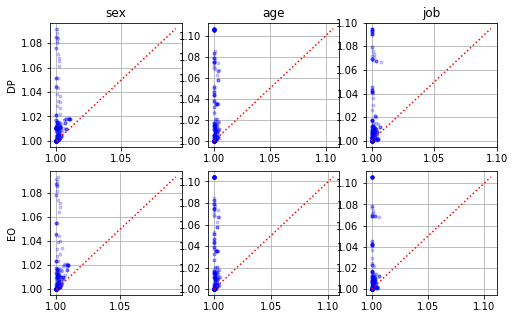

In [15]:
plt.figure(figsize=(8, 5))
s=1
dataset_name = "german"
for fairness_def in ["dp", "eo"]:
    data = pickle.load(open("./data/polf-3-fair-{}-{}.pickle".format(dataset_name, fairness_def), "rb"))
#     features = list(dataset_from_name(dataset_name))
    for Xs in ["sex", "age", "job"]:
        plt.subplot(2,3,s)
        if s < 4:
            plt.title(Xs)
        if s == 1:
            plt.ylabel("DP")
        elif s == 4:
            plt.ylabel("EO")
        polf = [[], [], [], []]
        for i in range(len(data[Xs])):
            for j in range(4):
                polf[j] += list(data[Xs][i][j])
        print (len(polf[0]), np.mean(np.array(polf[0]) < np.array(polf[1])))
        plt.plot(polf[0], polf[1], ".", color="blue", alpha=0.2)
        plt.plot([1, np.max(polf[1])], [1, np.max(polf[1])], color="red", linestyle=":")
        plt.grid()
        s += 1
plt.savefig("../fig/polf1-polf2-{}.pdf".format(dataset_name), bbox_inches="tight")

## Figure 12,14,16. Joint distribution of $PoLF_2$ and $PoLF_3$ for 3-stage algorithm

In [ ]:
plt.figure(figsize=(8, 5))
s=1
dataset_name = "german"
for fairness_def in ["dp", "eo"]:
    data = pickle.load(open("./data/polf-3-fair-{}-{}.pickle".format(dataset_name, fairness_def), "rb"))
    features = list(dataset_from_name(dataset_name))
    for Xs in ["sex", "age", "job"]:
        plt.subplot(2,3,s)
        if s < 4:
            plt.title(Xs)
        if s == 1:
            plt.ylabel("DP")
        elif s == 4:
            plt.ylabel("EO")
        polf = [[], [], [], []]
        for i in range(len(data[Xs])):
            for j in range(4):
                polf[j] += list(data[Xs][i][j])
        print (len(polf[1]), np.mean(np.array(polf[1]) < np.array(polf[2])))
        plt.plot(polf[1], polf[2], ".", color="red", alpha=0.2)
        plt.plot([1, np.max(polf[2])], [1, np.max(polf[2])], color="red", linestyle=":")
        plt.grid()
        s += 1
plt.savefig("../fig/polf2-polf3-{}.pdf".format(dataset_name), bbox_inches="tight")

250 0.852
250 0.912
250 0.952
250 0.868
250 0.912
250 0.9
